In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# np.random.normal(m,s,n)
# m: the mean of the normal distribution.
# s: the standard deviation of the distribution.
# n: the total number of samples to be drawn.

#class-1
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)
#class-2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)
#class-3
x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

In [16]:
x3[0:5]

array([53.49205016, 58.58683503, 56.2412104 , 61.1150312 , 61.36523225])

In [2]:
x = np.concatenate((x1,x2,x3), axis=0)
y = np.concatenate((y1,y2,y3), axis=0)

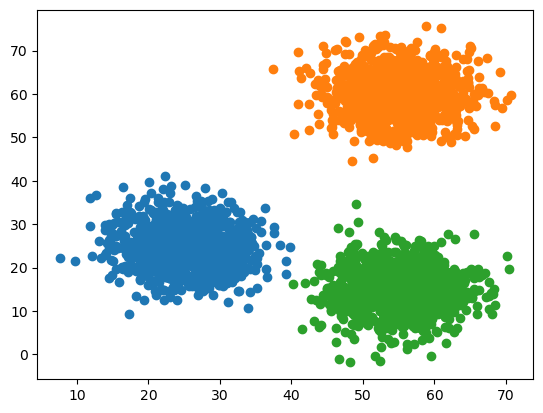

In [3]:
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

In [13]:
data.head()

,x,y,label
0,14.119758,23.320325,2
1,30.063951,23.502507,2
2,22.430251,25.157826,2
3,22.914731,22.875053,2
4,29.884308,30.612430,2


In [19]:
data.shape

(3000, 3)

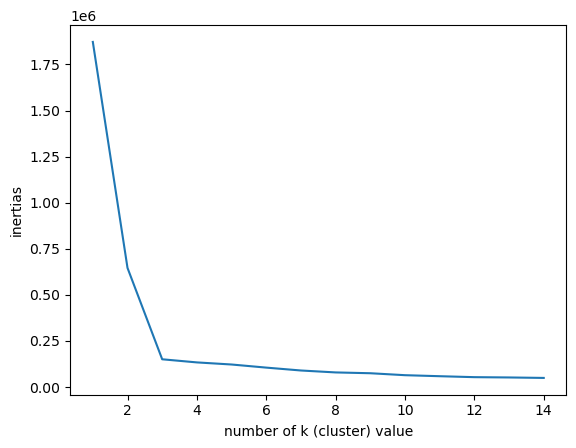

In [9]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,15),inertias)
plt.xlabel("number of k (cluster) value")
plt.ylabel("inertias")
plt.show()

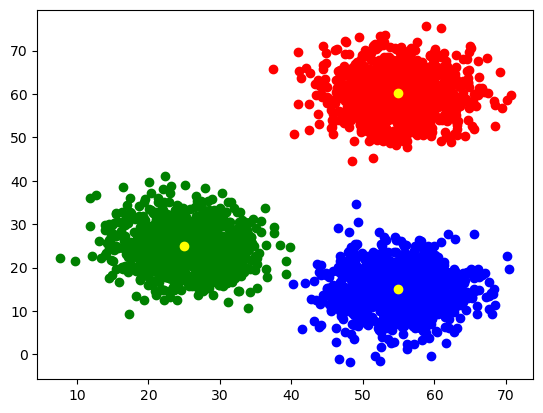

In [26]:
#%% k = 3 icin modelim

kmeans2 = KMeans(n_clusters=3, init='k-means++', n_init='auto') # good_init = k-means++
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()

In [28]:
kmeans2.cluster_centers_

array([[54.92017621, 60.16012343,  1.        ],
       [25.03060669, 24.91929684,  2.        ],
       [54.91589621, 15.06247039,  0.        ]])

In [29]:
new = [[25, 55, 55]]
kmeans2.predict(new)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [30]:
kmeans2.inertia_

150375.05203536456